In [1]:

# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up callbacks (optional but helpful)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9015 - loss: 0.3357 - val_accuracy: 0.9521 - val_loss: 0.1594
Epoch 2/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9525 - loss: 0.1580 - val_accuracy: 0.9657 - val_loss: 0.1179
Epoch 3/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9648 - loss: 0.1187 - val_accuracy: 0.9717 - val_loss: 0.0976
Epoch 4/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9706 - loss: 0.0949 - val_accuracy: 0.9721 - val_loss: 0.0940
Epoch 5/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9748 - loss: 0.0797 - val_accuracy: 0.9745 - val_loss: 0.0822
Epoch 6/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9782 - loss: 0.0690 - val_accuracy: 0.9751 - val_loss: 0.0852
Epoch 7/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9797 - loss: 0.0623 - val_accuracy: 0.9757 - val_loss: 0.0797
Epoch 8/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9827 - loss: 0.0542 - val_accuracy: 0.9778 - val_loss: 0.0763
Epoch 9/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9836 - loss: 0.0497 - val_accuracy: 0.978

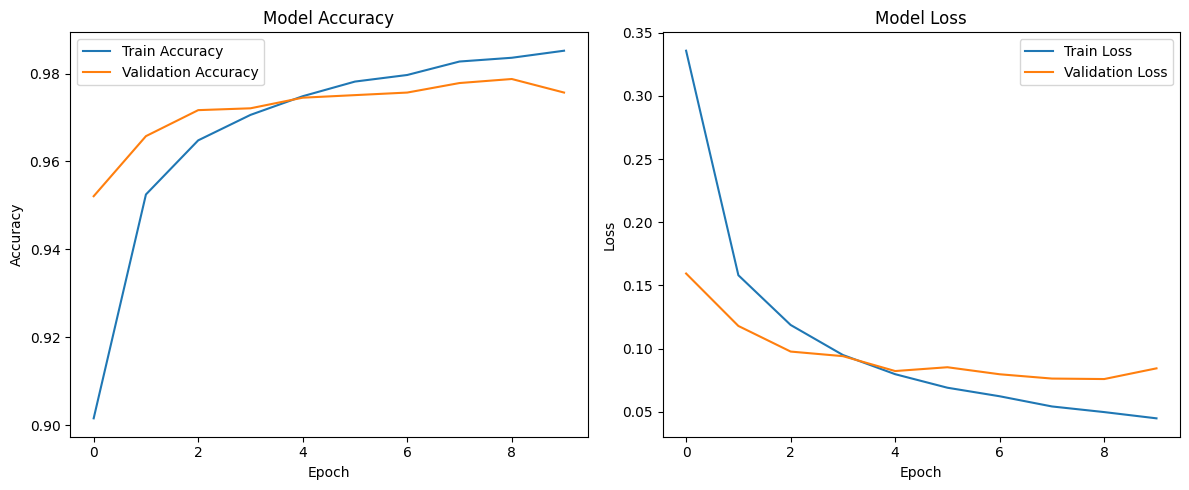

In [3]:

# Plot training history
def plot_history(hist):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)



Test Accuracy: 0.9791, Test Loss: 0.0712
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


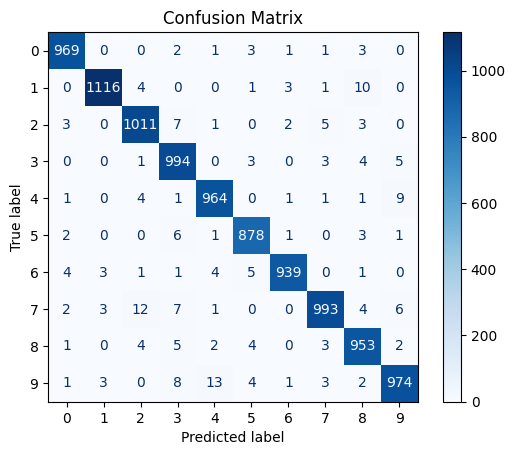

In [4]:

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

# Predict and show confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [5]:
model.save("digit_model.h5")